In [2]:
import pandas as pd
import json
import matplotlib
import matplotlib.pyplot as plt
from IPython.display import display, HTML
import json
import numpy as np
%matplotlib inline

In [3]:
def read_csv(fname):
    #f = lambda x : json.loads(x.replace("'","\""))
    #df = pd.read_csv(fname, converters={'sensor_type': f}, index_col=0)
    df = pd.read_csv(fname, index_col=0)
    return df

In [4]:
def save_graph(plot, fname='saved.png'):
    fig = plot.get_figure()
    fig.savefig(fname)

In [5]:
keys = {'all': ['ma_window', 'sensor_type', 'n_record', 'n_train', 'ms_interval'],
        'kNN': ['n_neighbors', 'algorithm'],
        'LOF': ['n_neighbors', 'algorithm'],
        'k-means': ['n_clusters', 'max_iter'],
        'NN': ['num_of_hidden_nodes', 'num_of_training_epochs', 'size_of_mini_batch', 'learning_rate'],
       }

def df_values(_df):
    print('--- common')
    for c in keys['all']:
        if c == 'auc': continue
        print("%-40s%s" % (c, _df[c].unique()))

    print('--- kNN')
    for c in keys['kNN']:
        if c == 'auc': continue
        print("%-40s%s" % (c, _df[_df['type']=='kNN'][c].unique()))
    
    print('--- LOF')
    for c in keys['LOF']:
        if c == 'auc': continue
        print("%-40s%s" % (c, _df[_df['type']=='LOF'][c].unique()))
    
    print('--- k-means')
    for c in keys['k-means']:
        if c == 'auc': continue
        print("%-40s%s" % (c, _df[_df['type']=='k-means'][c].unique()))
    
    print('--- NN')
    for c in keys['NN']:
        if c == 'auc': continue
        print("%-40s%s" % (c, _df[_df['type']=='NN'][c].unique()))

In [6]:
def show_graph(df_list, columns, x_title, y_title):
    df_list = [df[[x_title, y_title]] for df in df_list]
    
    df_list = [df.rename(index=str, columns={y_title: c}) for df, c in zip(df_list, columns)]
    
    merge_df = df_list[0]
    for df in df_list[1:]:
        merge_df = merge_df.merge(df, on=[x_title], how='outer')
    
    v = merge_df[columns].values
    v_max, v_min = np.nanmax(v), np.nanmin(v)
    v_range = v_max - v_min
    
    display(merge_df)
    merge_df.plot.bar(x=x_title, ylim=[v_min - v_range*0.1, v_max + v_range*0.2])

--- common
ma_window                               [1]
sensor_type                             [ '["rssi.a", "rssi.b", ["gyro.rotationRate.x", "gyro.rotationRate.y", "gyro.rotationRate.z"]]']
n_record                                [1]
n_train                                 [  1   5  10  20 100]
ms_interval                             [20]
--- kNN
n_neighbors                             [ 1.  3.  5.  7.  9.]
algorithm                               ['ball_tree']
--- LOF
n_neighbors                             [ 1.  3.  5.  7.  9.]
algorithm                               ['ball_tree']
--- k-means
n_clusters                              [ 1.  3.  5.  7.  9.]
max_iter                                [ 3.]
--- NN
num_of_hidden_nodes                     [  4.   8.  16.  32.]
num_of_training_epochs                  [ 100.  400.]
size_of_mini_batch                      [ 10.]
learning_rate                           [ 0.02]


,n_train,kNN,LOF,k-menas,NN
0,5,0.934722,0.904306,0.944074,0.945046
1,10,0.947546,0.943102,0.944259,0.947685
2,20,0.962176,0.909583,0.957176,0.961389
3,100,0.953565,0.902639,0.952407,0.955648
4,1,NaN,NaN,0.906111,0.898519


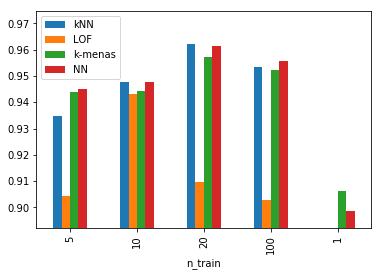

In [6]:
#csv_file = 'test_record_01_01_01__^01_01__^01_0[23].csv'
#csv_file = 'test_record_01_11_01__^01_11__^01_1[23].csv'
#csv_file = 'test_record_02_11_01__^02_11__^02_1[23].csv'
csv_file = 'test_record_02_01_01__^02_01__^02_0[23].csv'
df = read_csv(csv_file)

_d = df[
    (df['n_record'] == 1) & 
    (df['ms_interval'] == 20) &
    (df['sensor_type'].apply(lambda x: 'gyro.rotationRate' in x))
]
df_values(_d)

_d_knn = _d[(_d['type']=='kNN') & (_d['n_neighbors'] == 5)]
_d_nn  = _d[(_d['type']=='NN') & (_d['num_of_hidden_nodes'] == 32) & (_d['num_of_training_epochs'] == 100)]
_d_lof = _d[(_d['type']=='LOF') & (_d['n_neighbors'] == 5)]
_d_kms = _d[(_d['type']=='k-means') & (_d['n_clusters'] == 1)]

show_graph([_d_knn, _d_lof, _d_kms, _d_nn], ['kNN',  'LOF', 'k-menas', 'NN'], 'n_train', 'auc')

total 35998 results
--- common
ma_window                               [1]
sensor_type                             [ '["rssi.a", "rssi.b", ["userAcceleration.x", "userAcceleration.y", "userAcceleration.z"]]']
n_record                                [-20  -5  -2  -1   0   1   2   5  20]
n_train                                 [5]
ms_interval                             [20]
--- kNN
n_neighbors                             [ 1.  3.  5.]
algorithm                               ['ball_tree']
--- LOF
n_neighbors                             []
algorithm                               []
--- k-means
n_clusters                              []
max_iter                                []
--- NN
num_of_hidden_nodes                     []
num_of_training_epochs                  []
size_of_mini_batch                      []
learning_rate                           []


,n_neighbors,-20,-5,-2,-1,0,1,2,5,20
0,1.0,0.998657,0.992917,0.980694,0.974907,0.961157,0.966620,0.969722,0.974537,0.984398
1,3.0,0.999120,0.993148,0.983704,0.976157,0.962639,0.968380,0.968935,0.974630,0.986389
2,5.0,0.998843,0.990417,0.982130,0.975093,0.962361,0.972824,0.973843,0.970972,0.986667


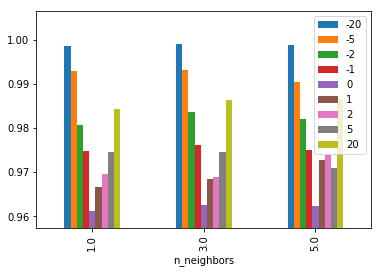

In [7]:
#csv_file = 'test_record_02_11_01__^02_11__^02_1[23].csv'
csv_file = 'test_record_02_01_01__^02_01__^02_0[23].csv'
#csv_file = 'test_record_01_01_01__^01_01__^01_0[23].csv'
#csv_file = 'test_record_01_11_01__^01_11__^01_1[23].csv'
df = read_csv(csv_file)
print('total %d results'%(len(df)))

_d = df[
    (df['n_train'] == 5) &
    (df['ma_window'] == 1) &
    (df['ms_interval'] == 20) &
#    (df['num_of_hidden_nodes'] == 4) &
    (df['sensor_type'].apply(lambda x: 'user' in x and len(json.loads(x)) == 3))
]

_d  = _d[(_d['type']=='kNN')]
df_values(_d)

_d_n_record = [_d[_d['n_record'] == x] for x in _d['n_record'].unique()]

show_graph(_d_n_record, list(_d['n_record'].unique()), 'n_neighbors', 'auc')

total 37754 results
--- common
ma_window                               [1]
sensor_type                             [ '["rssi.a", "rssi.b", ["userAcceleration.x", "userAcceleration.y", "userAcceleration.z"]]']
n_record                                [-40 -20  -5  -2  -1   0   1   2   5  20]
n_train                                 [10]
ms_interval                             [20]
--- kNN
n_neighbors                             []
algorithm                               []
--- LOF
n_neighbors                             []
algorithm                               []
--- k-means
n_clusters                              []
max_iter                                []
--- NN
num_of_hidden_nodes                     [ 32.]
num_of_training_epochs                  [ 100.  400.]
size_of_mini_batch                      [ 10.]
learning_rate                           [ 0.02]


,n_record,100.0,400.0
0,-40,0.999444,0.999444
1,-20,0.998194,0.998194
2,-5,0.995324,0.994167
3,-2,0.989259,0.988380
4,-1,0.982037,0.981204
5,0,0.971435,0.965880
6,1,0.980833,0.977130
7,2,0.990185,0.990370
8,5,0.992778,0.992731
9,20,0.994954,0.995139


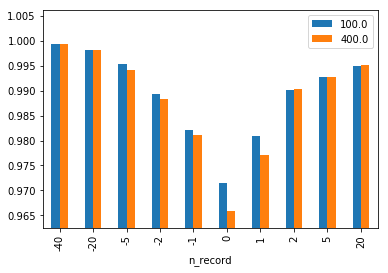

In [15]:
csv_file = 'test_record_02_11_01__^02_11__^02_1[23].csv'
#csv_file = 'test_record_02_01_01__^02_01__^02_0[23].csv'
#csv_file = 'test_record_01_01_01__^01_01__^01_0[23].csv'
#csv_file = 'test_record_01_11_01__^01_11__^01_1[23].csv'
df = read_csv(csv_file)
print('total %d results'%(len(df)))

_d = df[
#    (df['n_train'] == 5) &
    (df['ma_window'] == 1) &
    (df['ms_interval'] == 20) &
    (df['num_of_hidden_nodes'] == 32) &
#    (df['num_of_training_epochs'] == 400) &
    (df['n_train'] == 10) &
#    (df['n_neighbors'] == 3)
    (df['sensor_type'].apply(lambda x: 'user' in x and len(json.loads(x)) == 3))
]

_d  = _d[(_d['type']=='NN')]
df_values(_d)

x2_label = 'num_of_training_epochs'
x_label = 'n_record'

_d_n_record = [_d[_d[x2_label] == x] for x in _d[x2_label].unique()]

show_graph(_d_n_record, list(_d[x2_label].unique()), x_label, 'auc')

In [52]:
# remove sensor_type for iOS
csv_file = 'test_record_01_01_01__^01_01__^01_0[23].csv'
#csv_file = 'test_record_01_11_01__^01_11__^01_1[23].csv'
#csv_file = 'test_record_02_01_01__^02_01__^02_0[23].csv'
#csv_file = 'test_record_02_11_01__^02_11__^02_1[23].csv'
df = read_csv(csv_file)
df = df[~df['sensor_type'].apply(lambda x: 'acceleration' in x)]
df = df[~df['sensor_type'].apply(lambda x: 'gyro.rotationRate' in x)]
df = df[~df['sensor_type'].apply(lambda x: 'magneticField.x' in x)]
df = df[~df['sensor_type'].apply(lambda x: 'attitude.roll' in x)]
df = df[~df['sensor_type'].apply(lambda x: 'rotationRate.x' in x)]
df = df[~df['sensor_type'].apply(lambda x: 'gravity.x' in x)]
df = df[~df['sensor_type'].apply(lambda x: 'userAcceleration.x' in x)]
print(len(df))
df_values(df)
df.to_csv(csv_file)

28618
--- common
ma_window                               [1 3]
sensor_type                             ['["rssi.a", "rssi.b"]'
 '["rssi.a", "rssi.b", ["linear_accel[0]", "linear_accel[1]", "linear_accel[2]"]]'
 '["rssi.a", "rssi.b", ["accelerometer[0]", "accelerometer[1]", "accelerometer[2]"]]'
 '["rssi.a", "rssi.b", ["gravity[0]", "gravity[1]", "gravity[2]"]]'
 '["rssi.a", "rssi.b", ["gyro[0]", "gyro[1]", "gyro[2]"]]'
 '["rssi.a", "rssi.b", ["rotation[0]", "rotation[1]", "rotation[2]"]]'
 '["rssi.a", "rssi.b", ["game_rotation[0]", "game_rotation[1]", "game_rotation[2]"]]'
 '["rssi.a", "rssi.b", ["magnetic[0]", "magnetic[1]", "magnetic[2]"]]'
 '["rssi.a", "rssi.b", "pressure"]']
n_record                                [-20  -5  -2  -1   0   1   2   5  20]
n_train                                 [  1   5  10  20 100]
ms_interval                             [ 20  60 100]
--- kNN
n_neighbors                             [ 1.  3.  5.  7.  9.]
algorithm                               ['ball_t

In [46]:
#### print parameters evaluated in csv
#csv_file = 'test_record_01_01_01__^01_01__^01_0[23].csv'
csv_file = 'test_record_01_11_01__^01_11__^01_1[23].csv'
#csv_file = 'test_record_02_01_01__^02_01__^02_0[23].csv'
#csv_file = 'test_record_02_11_01__^02_11__^02_1[23].csv'
df = read_csv(csv_file)
print('total %d results'%(len(df)))
df_values(df)

total 50717 results
--- common
ma_window                               [1 3]
sensor_type                             ['["rssi.a", "rssi.b"]'
 '["rssi.a", "rssi.b", ["linear_accel[0]", "linear_accel[1]", "linear_accel[2]"]]'
 '["rssi.a", "rssi.b", ["accelerometer[0]", "accelerometer[1]", "accelerometer[2]"]]'
 '["rssi.a", "rssi.b", ["gravity[0]", "gravity[1]", "gravity[2]"]]'
 '["rssi.a", "rssi.b", ["gyro[0]", "gyro[1]", "gyro[2]"]]'
 '["rssi.a", "rssi.b", ["rotation[0]", "rotation[1]", "rotation[2]"]]'
 '["rssi.a", "rssi.b", ["game_rotation[0]", "game_rotation[1]", "game_rotation[2]"]]'
 '["rssi.a", "rssi.b", ["magnetic[0]", "magnetic[1]", "magnetic[2]"]]'
 '["rssi.a", "rssi.b", "pressure"]'
 '["rssi.a", "rssi.b", ["acceleration.x", "acceleration.y", "acceleration.z"]]'
 '["rssi.a", "rssi.b", ["gyro.rotationRate.x", "gyro.rotationRate.y", "gyro.rotationRate.z"]]'
 '["rssi.a", "rssi.b", ["magneticField.x", "magneticField.y", "magneticField.z"]]'
 '["rssi.a", "rssi.b", ["attitude.roll", 

[1, 2, 3]